In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("muted")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Benign Data

In [72]:
# open a capture with the normal data from a scenario
data = pd.read_pickle('Datasets/UNSW-NB15/UNSW-NB15-1/normal.pkl')

## The structure of the dataset

In [73]:
data.head()

,src_ip,src_port,dst_ip,dst_port,protocol,state,duration,src_bytes,dst_bytes,missed_src_bytes,missed_dst_bytes,service,src_packets,dst_packets,date,end_date,detailed_label,label,protocol_num
0,10.40.182.1,0,224.0.0.5,0,ospf,INT,50.004337,384,0,0,0,missing,6,0,2015-01-22 11:49:37,2015-01-22 11:50:27,missing,0,3
1,10.40.182.1,0,224.0.0.5,0,ospf,INT,50.004337,384,0,0,0,missing,6,0,2015-01-22 11:49:37,2015-01-22 11:50:27,missing,0,3
2,10.40.85.1,0,224.0.0.5,0,ospf,INT,50.004341,384,0,0,0,missing,6,0,2015-01-22 11:49:37,2015-01-22 11:50:27,missing,0,3
3,10.40.85.1,0,224.0.0.5,0,ospf,INT,50.004341,384,0,0,0,missing,6,0,2015-01-22 11:49:37,2015-01-22 11:50:27,missing,0,3
4,192.168.241.243,259,192.168.241.243,49320,icmp,URH,0.000000,1780,0,0,0,missing,5,0,2015-01-22 11:49:41,2015-01-22 11:50:39,missing,0,4


## Some basic statistics

In [74]:
data.describe()

,src_port,dst_port,duration,src_bytes,dst_bytes,missed_src_bytes,missed_dst_bytes,src_packets,dst_packets,label,protocol_num
count,677785.000000,6.777850e+05,677785.000000,6.777850e+05,6.777850e+05,677785.000000,677785.000000,677785.000000,677785.000000,677785.0,677785.000000
mean,32414.883596,1.586570e+04,0.853139,4.745585e+03,4.959335e+04,6.338314,21.873334,42.541890,56.727653,0.0,1.447522
std,19180.555868,9.260546e+05,26.339835,1.317654e+04,1.864853e+05,9.985018,64.738830,74.355924,139.048097,0.0,0.902585
min,-1.000000,-1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,15687.000000,5.300000e+01,0.004225,5.120000e+02,3.040000e+02,0.000000,0.000000,4.000000,4.000000,0.0,0.000000
50%,32489.000000,4.161000e+03,0.027880,2.158000e+03,3.380000e+03,4.000000,5.000000,18.000000,18.000000,0.0,2.000000
75%,48931.000000,2.611600e+04,0.327875,3.910000e+03,2.327800e+04,7.000000,16.000000,52.000000,50.000000,0.0,2.000000
max,65535.000000,5.389893e+08,8786.637695,1.592581e+06,1.641360e+06,560.000000,583.000000,1233.000000,1278.000000,0.0,59.000000


## Port Visualizations

### Source Port Distribution

Text(0, 0.5, 'Number of flows')

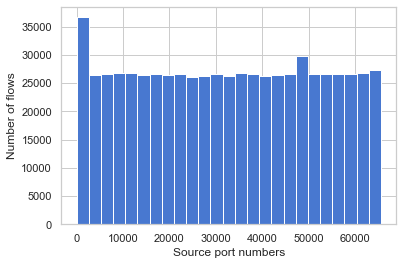

In [75]:
data['src_port'].hist(bins=25)
plt.xlabel('Source port numbers')
plt.ylabel('Number of flows')

Text(0, 0.5, 'Density')

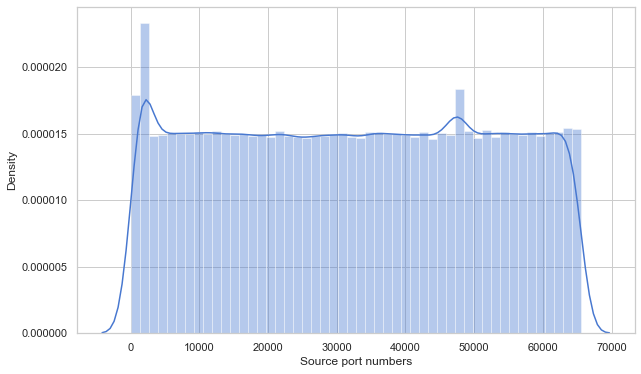

In [76]:
plt.figure(figsize=(10, 6))
sns.distplot(data["src_port"])
plt.xlabel("Source port numbers")
plt.ylabel("Density")

### Destination Port

Text(0, 0.5, 'Number of flows')

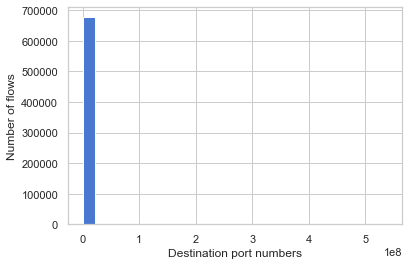

In [77]:
data['dst_port'].hist(bins=25)
plt.xlabel('Destination port numbers')
plt.ylabel('Number of flows')

Text(0, 0.5, 'Density')

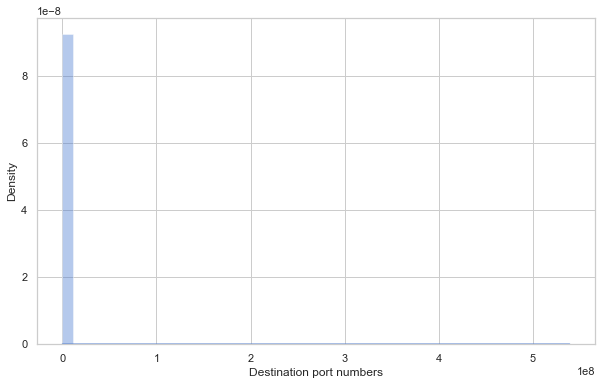

In [78]:
plt.figure(figsize=(10, 6))
sns.distplot(data["dst_port"])
plt.xlabel("Destination port numbers")
plt.ylabel("Density")

### Source and Destination Port number range

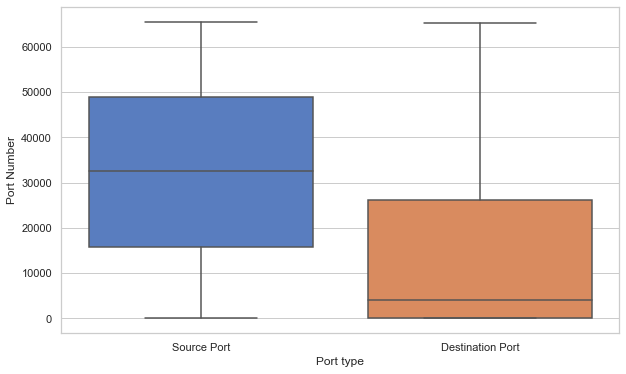

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Port type", y="Port Number", showfliers=False, data=pd.melt(data[["src_port", "dst_port"]].rename(columns={"src_port": "Source Port", "dst_port": "Destination Port"})).rename(columns={"variable": "Port type", "value": "Port Number"}))

## Protocol distribution

Text(0.5, 0, 'Protocol')

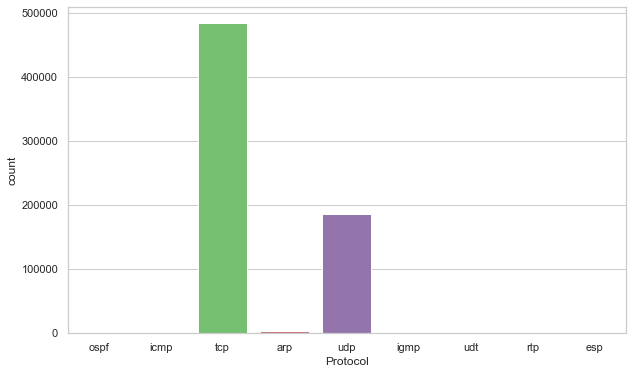

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=data)
plt.xlabel("Protocol")

## Bytes Distribution

Text(0, 0.5, 'Number of bytes')

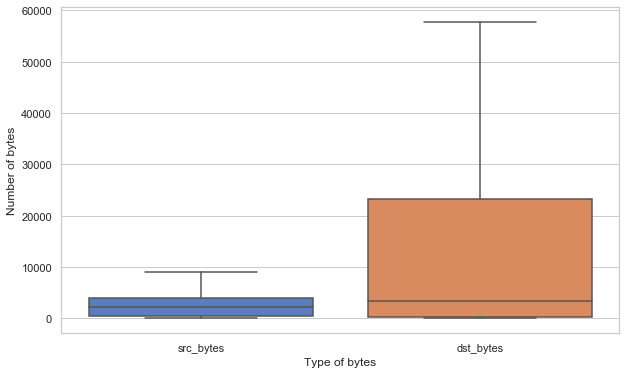

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(data[['src_bytes', 'dst_bytes']]), showfliers=False)
plt.xlabel('Type of bytes')
plt.ylabel('Number of bytes')

## Duration Distribution

Text(0, 0.5, 'Number of flows')

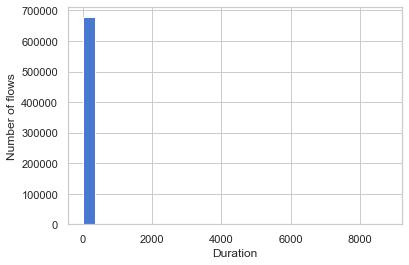

In [82]:
data['duration'].hist(bins=25)
plt.xlabel('Duration')
plt.ylabel('Number of flows')

Text(0, 0.5, 'Density')

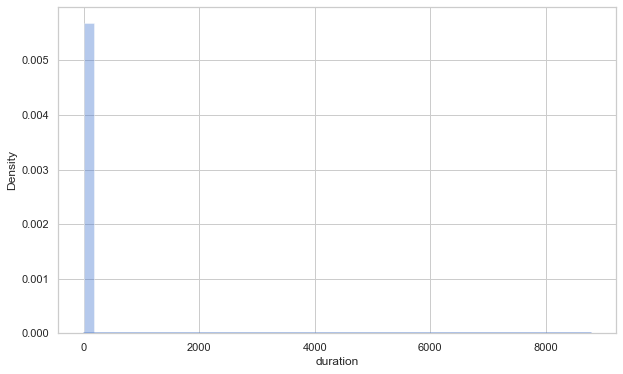

In [83]:
plt.figure(figsize=(10, 6))
sns.distplot(data["duration"])
plt.ylabel("Density")

Text(0.5, 0, 'Duration')

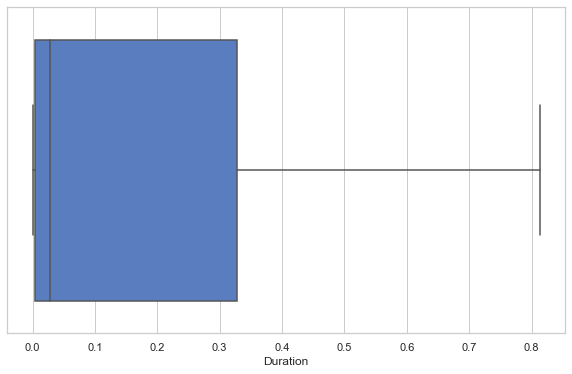

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["duration"], showfliers=False)
plt.xlabel("Duration")

## Number of flows/sec

Text(0.5, 0, 'Date')

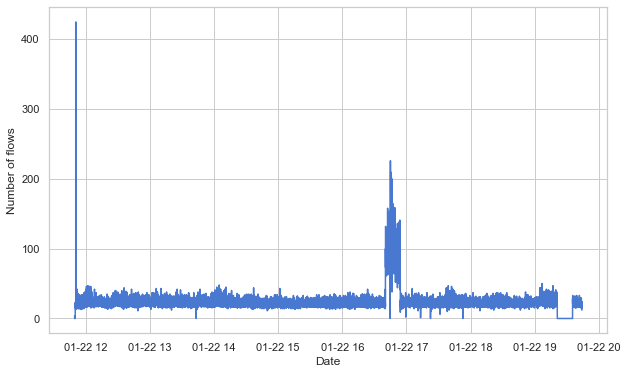

In [85]:
plt.figure(figsize=(10, 6))
binned_flows = data[['date', 'protocol']].groupby(pd.Grouper(key='date', freq='S')).count().rename(columns={'protocol': 'Number of flows'}).reset_index()
sns.lineplot(x='date', y='Number of flows', data=binned_flows)
plt.xlabel("Date")

## Number of hosts in the dataset

In [86]:
data['src_ip'].nunique()

40

## Flows per host

In [87]:
flows_per_host = data.groupby('src_ip').size().reset_index().rename(columns={0: 'num_flows'})
flows_per_host

,src_ip,num_flows
0,10.40.170.2,874
1,10.40.182.1,1670
2,10.40.182.3,874
3,10.40.85.1,1680
4,10.40.85.30,888
5,127.0.0.1,1
6,149.171.126.0,192
7,149.171.126.1,251
8,149.171.126.10,3
9,149.171.126.11,16


Text(0, 0.5, 'Number of hosts')

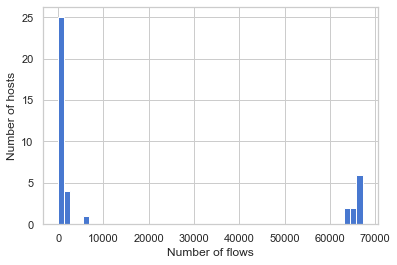

In [88]:
flows_per_host['num_flows'].hist(bins=50)
plt.xlabel('Number of flows')
plt.ylabel('Number of hosts')

## Number of connections in the dataset

In [89]:
flows_per_connection = data.groupby(['src_ip', 'dst_ip']).size().reset_index().rename(columns={0: 'Number of flows'})
flows_per_connection.shape[0]

273

## Flows per connection

In [90]:
flows_per_connection

,src_ip,dst_ip,Number of flows
0,10.40.170.2,10.40.170.2,874
1,10.40.182.1,10.40.182.3,708
2,10.40.182.1,10.40.198.10,6
3,10.40.182.1,224.0.0.5,956
4,10.40.182.3,10.40.182.3,874
...,...,...,...
268,59.166.0.9,149.171.126.5,6456
269,59.166.0.9,149.171.126.6,6223
270,59.166.0.9,149.171.126.7,6338
271,59.166.0.9,149.171.126.8,6130


Text(0, 0.5, 'Number of connections')

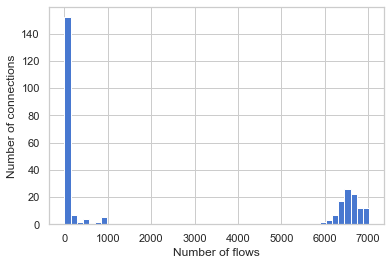

In [91]:
flows_per_connection['Number of flows'].hist(bins=50)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections')

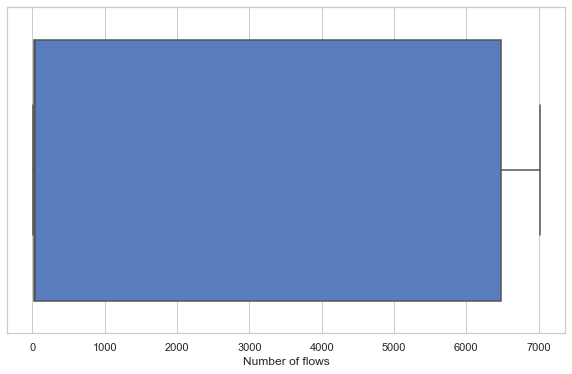

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=flows_per_connection['Number of flows'], showfliers=False)